In [1]:
# Morphology

In [1]:
import cv2
import matplotlib.pyplot as plt
import skimage as ski
from img_util import imshow                 # module created by myself

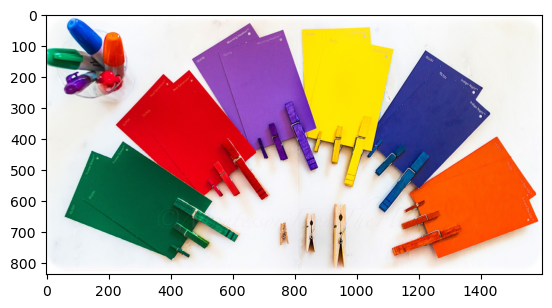

In [2]:
img = cv2.imread('img.jpeg')
plt.imshow(img[:,:,::-1])

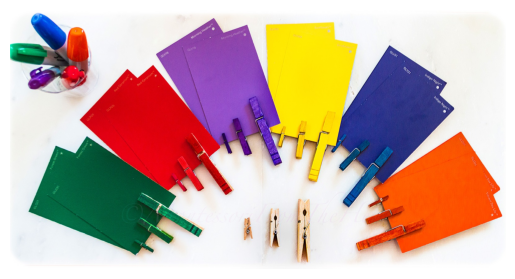

In [3]:
imshow(img[:,:,::-1],'')

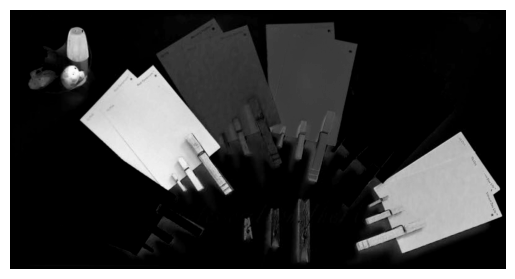

In [4]:
red_img = cv2.subtract(img[:,:,-1], cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
imshow(red_img, '', 'gray')

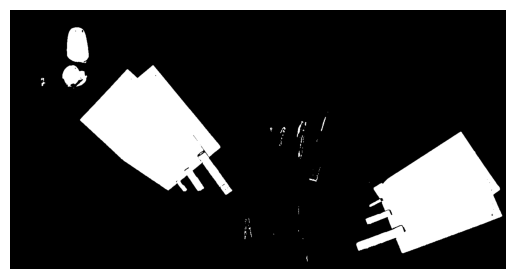

In [5]:
_, red_bw = cv2.threshold(red_img, 60, 255, cv2.THRESH_BINARY)
imshow(red_bw, '', 'gray')

In [6]:
strel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 10))
strel

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=uint8)

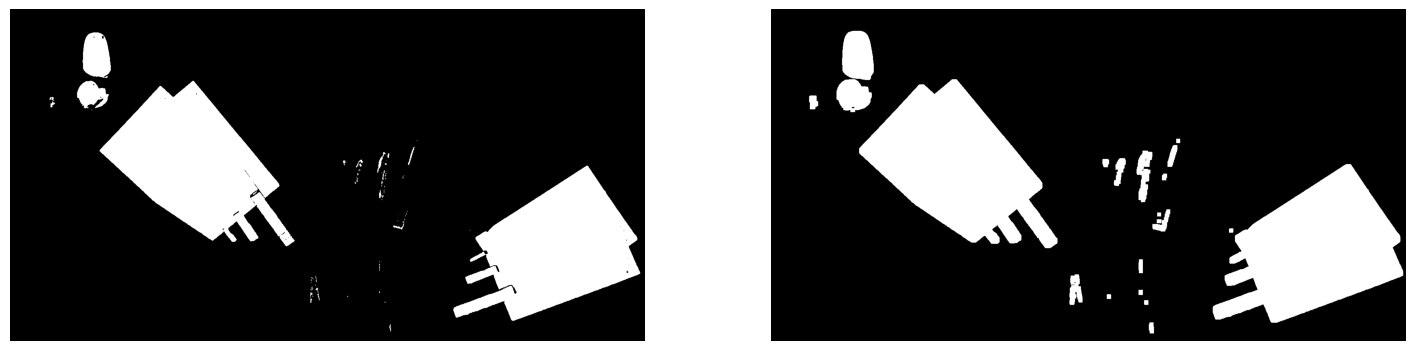

In [7]:
# DILATION
plt.figure(figsize=(18,6))
plt.subplot(121);
imshow(red_bw, '', 'gray')
plt.subplot(122)

red_dilate = cv2.dilate(red_bw, strel)
imshow(red_dilate,'', 'gray')

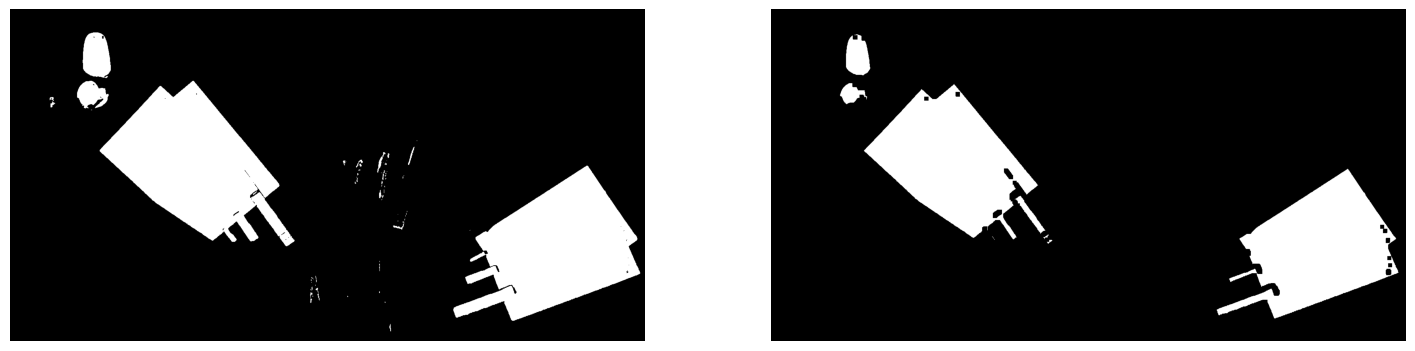

In [8]:
# EROSION
plt.figure(figsize=(18,6))
plt.subplot(121);
imshow(red_bw, '', 'gray')
plt.subplot(122)

red_erode = cv2.erode(red_bw, strel)
imshow(red_erode, '', 'gray')

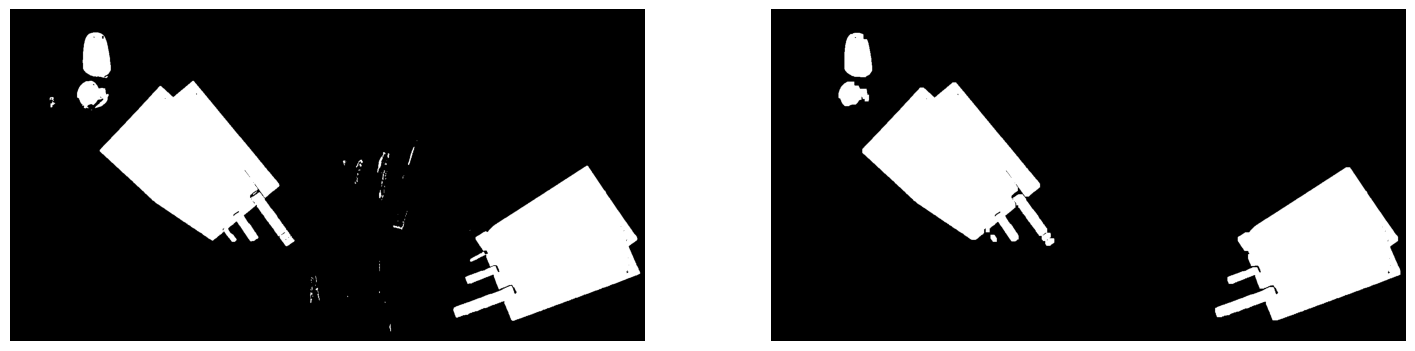

In [9]:
# OPENING-----> ERODE THEN DILATE

plt.figure(figsize=(18,6))
plt.subplot(121);
imshow(red_bw, '', 'gray')
plt.subplot(122)

red_open = cv2.morphologyEx(red_bw, cv2.MORPH_OPEN, strel, iterations = 1)
imshow(red_open,'', 'gray')

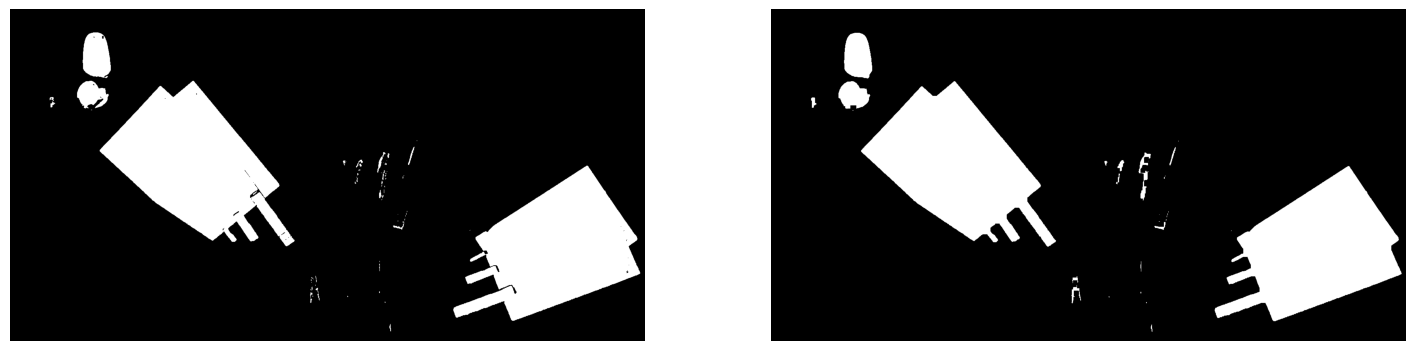

In [10]:
# CLOSING -----------> DILATE THEN ERODE

plt.figure(figsize=(18,6))
plt.subplot(121);
imshow(red_bw, '', 'gray')
plt.subplot(122)

red_close = cv2.morphologyEx(red_bw, cv2.MORPH_CLOSE, strel, iterations = 1)
imshow(red_close,'', 'gray')

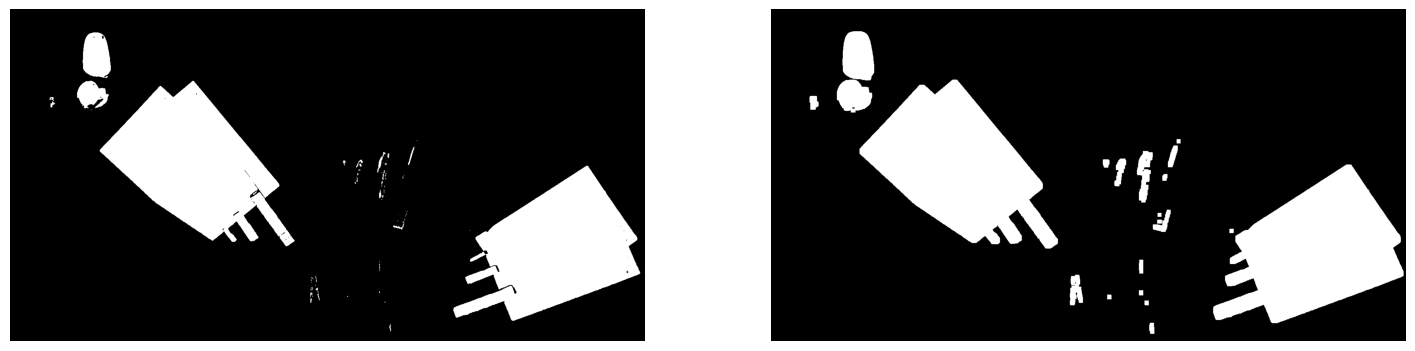

In [11]:
# APPLYING OPENING ON DILATION RESULT

plt.figure(figsize=(18,6))
plt.subplot(121);
imshow(red_bw, '', 'gray')
plt.subplot(122)

red_close2 = cv2.morphologyEx(red_dilate, cv2.MORPH_OPEN, strel, iterations = 1)
imshow(red_close2,'', 'gray')

In [12]:
help(ski.morphology.remove_small_objects)

Help on function remove_small_objects in module skimage.morphology.misc:

remove_small_objects(ar, min_size=64, connectivity=1, in_place=False, *, out=None)
    Remove objects smaller than the specified size.
    
    Expects ar to be an array with labeled objects, and removes objects
    smaller than min_size. If `ar` is bool, the image is first labeled.
    This leads to potentially different behavior for bool and 0-and-1
    arrays.
    
    Parameters
    ----------
    ar : ndarray (arbitrary shape, int or bool type)
        The array containing the objects of interest. If the array type is
        int, the ints must be non-negative.
    min_size : int, optional (default: 64)
        The smallest allowable object size.
    connectivity : int, {1, 2, ..., ar.ndim}, optional (default: 1)
        The connectivity defining the neighborhood of a pixel. Used during
        labelling if `ar` is bool.
    in_place : bool, optional (default: False)
        If ``True``, remove the objects i

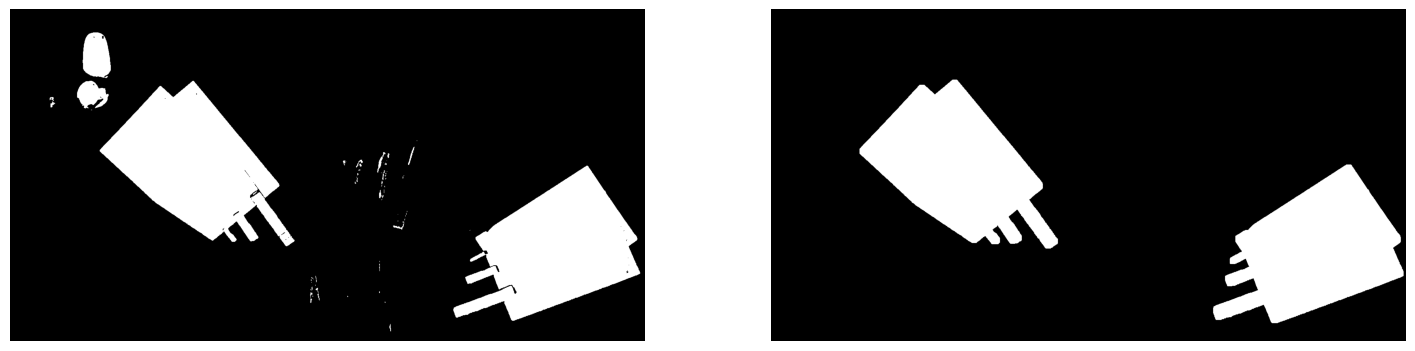

In [13]:

plt.figure(figsize=(18,6))
plt.subplot(121);
imshow(red_bw, '', 'gray')
plt.subplot(122)

red_close3 = ski.morphology.remove_small_objects(red_close2.astype(bool), 15000)              # if number of pixels are less then 15000 at some place it is then considered as a noise and it will remove it
imshow(red_close3,'', 'gray')                                                                 # skimage uses binary image

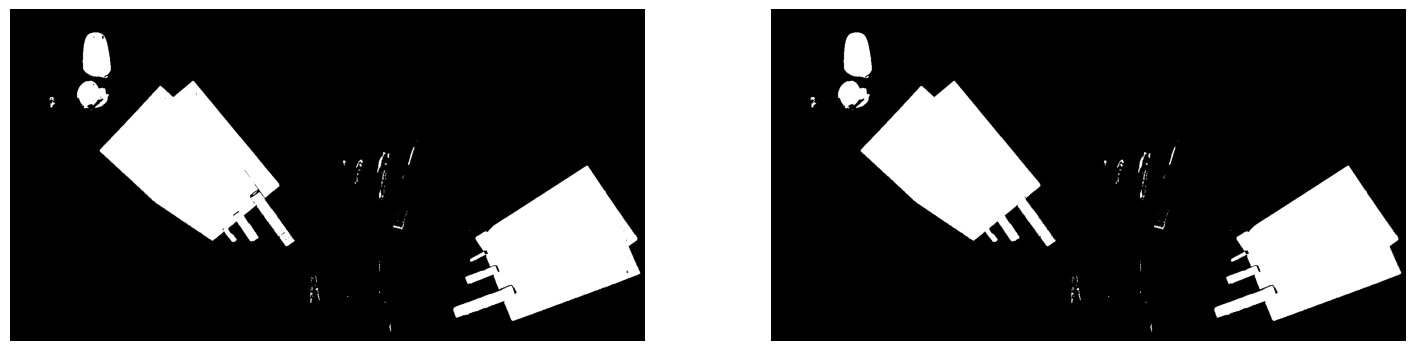

In [14]:
plt.figure(figsize=(18,6))
plt.subplot(121);
imshow(red_bw, '', 'gray')
plt.subplot(122)

red_close4 = ski.morphology.remove_small_holes(red_bw.astype(bool), 15000)       # small holes removes holes directly from the object where remove_small_objects requires some processing on original image  
imshow(red_close4,'', 'gray')  

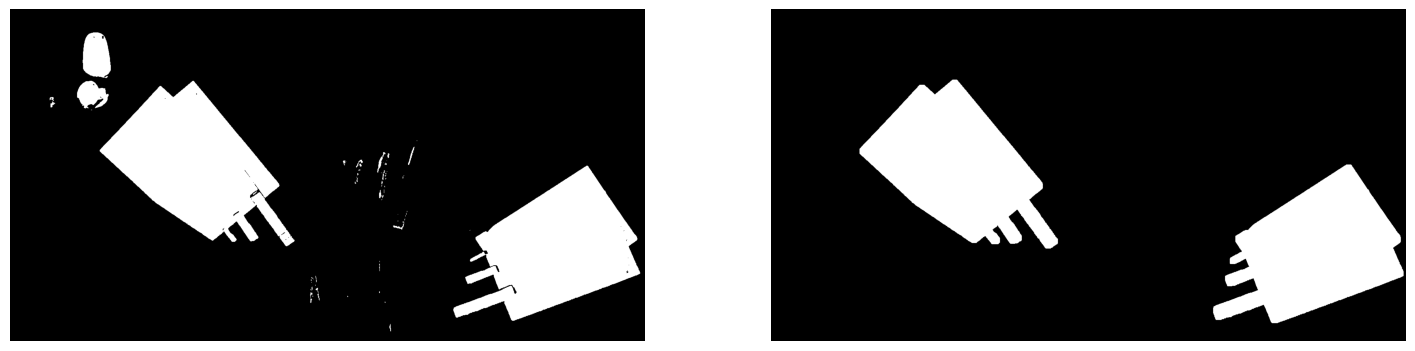

In [15]:

plt.figure(figsize=(18,6))
plt.subplot(121);
imshow(red_bw, '', 'gray')
plt.subplot(122)

red_close3 = ski.morphology.remove_small_objects(red_close2.astype(bool), 15000)              # if number of pixels are less then 15000 at some place it is then considered as a noise and it will remove it
imshow(red_close3,'', 'gray')                                                                 # skimage uses binary image

In [16]:
print(red_close3.dtype)


bool


In [17]:
rp = ski.measure.regionprops(
    ski.measure.label(
        red_close3.astype('uint8')
        )
)
rp

In [18]:
ski.measure.label(
        red_close3.astype('uint8')
        ).max()

2

In [19]:
red_close3.astype('uint8').max()*255

255

In [20]:
# SUMAMRY

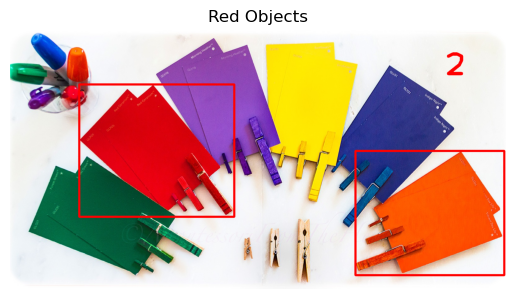

In [21]:
img_copy = img.copy()
for r in rp:
    y1,x1,y2,x2 = r.bbox
    cv2.rectangle(img_copy, (x1,y1), (x2,y2), color=[0,0,255], thickness=5)
count = str(len(rp))
cv2.putText(
            img_copy, count, (img_copy.shape[1]-200, 150), 
            cv2.FONT_HERSHEY_PLAIN, 7, (0,0,255), thickness=10
    )
imshow(img_copy[:,:,::-1], 'Red Objects')

In [29]:
vid = cv2.VideoCapture(0)
while True:
    ack, img = vid.read()
    if ack:
        red_img = cv2.subtract(img[:,:,-1], cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
        _, red_bw = cv2.threshold(red_img, 60, 255, cv2.THRESH_BINARY)
        strel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 10))
        red_dilate = cv2.dilate(red_bw, strel)
        red_close2 = cv2.morphologyEx(red_dilate, cv2.MORPH_OPEN, strel, iterations = 1)
        red_close3 = ski.morphology.remove_small_objects(red_close2.astype(bool), 15000)              # if number of pixels are less then 15000 at some place it is then considered as a noise and it will remove it
        rp = ski.measure.regionprops(
            ski.measure.label(
            red_close3.astype('uint8')
            )
        )
        img_copy = img.copy()
        for r in rp:
            y1,x1,y2,x2 = r.bbox
            cv2.rectangle(img_copy, (x1,y1), (x2,y2), color=[0,0,255], thickness=5)
        count = str(len(rp))
        cv2.putText(
                    img_copy, count, (img_copy.shape[1]-200, 150), 
                    cv2.FONT_HERSHEY_PLAIN, 7, (0,0,255), thickness=10
            )

        cv2.imshow('Preview', img_copy)
        key = cv2.waitKey(1)             # waitkey jb imshow ho rha h to agr keyboard se koi button press kiya use capture kr lega
        if key == ord('x'):              # it gives its ascii code
            break

cv2.destroyAllWindows()
vid.release()           # for freeing the camera


In [23]:
ack

True